In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

In [196]:
movies = pd.read_csv('Netflix_Titles.csv')

In [197]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious


In [198]:
movies.index

RangeIndex(start=0, stop=922, step=1)

In [199]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'mode'],
      dtype='object')

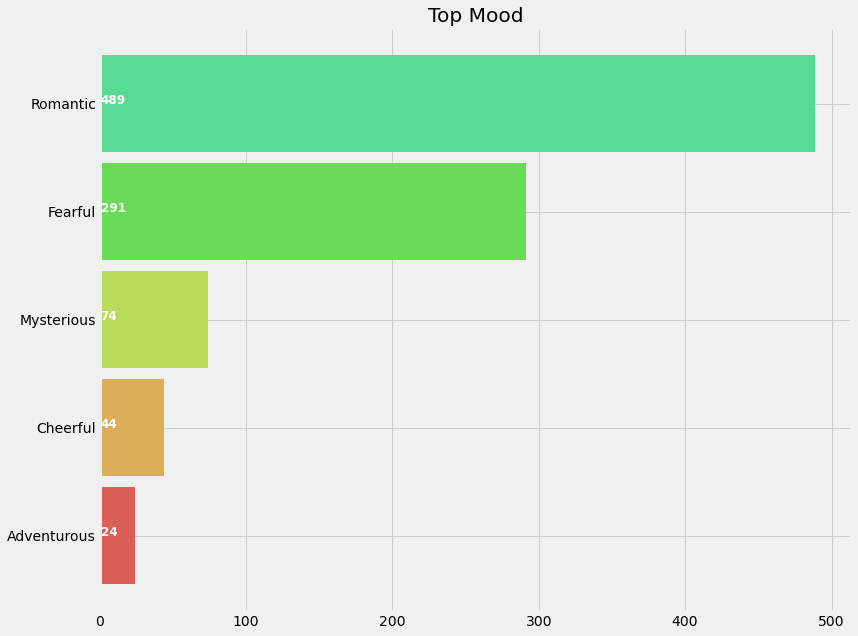

In [200]:
plt.subplots(figsize=(12,10))
list1 = []

for index, row in movies.iterrows():
    duration = row["mode"]
    list1.append(duration)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Mood')
plt.show()

In [201]:
moodList = []
for index, row in movies.iterrows():
    moods = row["mode"]
    
    if moods not in moodList:
        moodList.append(moods)

moodList[:10] #now we have a list with unique genres

['Fearful', 'Adventurous', 'Mysterious', 'Romantic', 'Cheerful']

In [202]:
def binary(mood_list):
    binaryList = []
    
    for mood in moodList:
        if mood in mood_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [203]:
movies['mood_bin'] = movies['mode'].apply(lambda x: binary(x))
movies['mood_bin'].head()

0    [1, 0, 0, 0, 0]
1    [0, 1, 0, 0, 0]
2    [1, 0, 0, 0, 0]
3    [1, 0, 0, 0, 0]
4    [0, 0, 1, 0, 0]
Name: mood_bin, dtype: object

In [204]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,mood_bin
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful,"[1, 0, 0, 0, 0]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous,"[0, 1, 0, 0, 0]"
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful,"[1, 0, 0, 0, 0]"
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful,"[1, 0, 0, 0, 0]"
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious,"[0, 0, 1, 0, 0]"


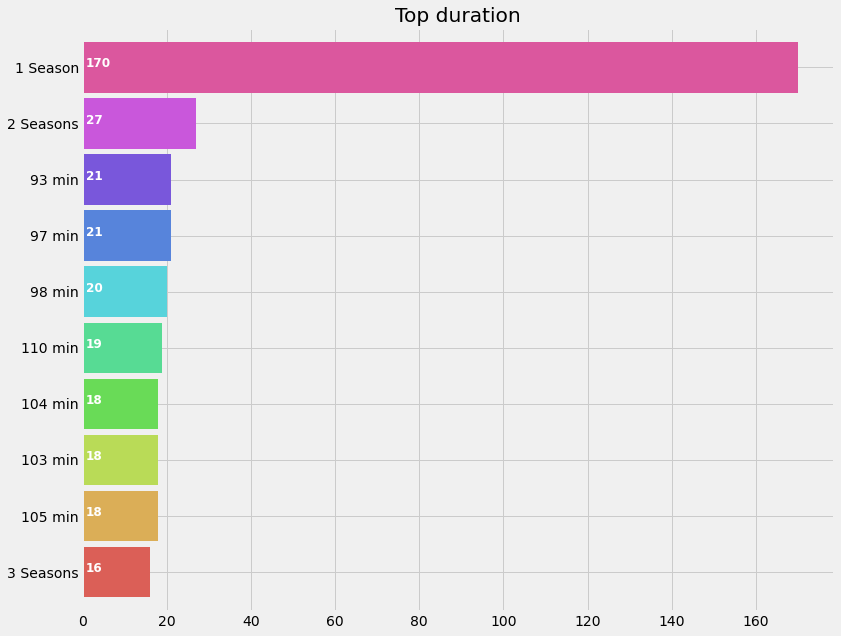

In [205]:
plt.subplots(figsize=(12,10))
list1 = []

for index, row in movies.iterrows():
    duration = row["duration"]
    list1.append(duration)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top duration')
plt.show()

In [206]:
durationList = []
for index, row in movies.iterrows():
    durations = row["duration"]
    
    if durations not in durationList:
        durationList.append(durations)

durationList[:10] #now we have a list with unique genres

['4 Seasons',
 '93 min',
 '78 min',
 '80 min',
 '1 Season',
 '118 min',
 '143 min',
 '103 min',
 '89 min',
 '91 min']

In [207]:
def binary(duration_list):
    binaryList = []
    
    for duration in durationList:
        if duration in duration_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [208]:
movies['duration_bin'] = movies['duration'].apply(lambda x: binary(x))
movies['duration_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: duration_bin, dtype: object

In [209]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,mode,mood_bin,duration_bin
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Fearful,"[1, 0, 0, 0, 0]","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adventurous,"[0, 1, 0, 0, 0]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Fearful,"[1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Fearful,"[1, 0, 0, 0, 0]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,Mysterious,"[0, 0, 1, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [210]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    #get movie by ID number
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    
    moodA = a['mood_bin']
    moodB = b['mood_bin']
    
    moodDistance = spatial.distance.cosine(moodA, moodB)
    
    durationA = a['duration_bin']
    durationB = b['duration_bin']
    durationDistance = spatial.distance.cosine(durationA, durationB)
    
    return moodDistance + durationDistance

In [211]:
Similarity(9,10)

1.0

In [212]:
def recommend_movie(mood,duration):
    movieList = []
    desired_mood = desired_mood_bin(mood)
    desired_duration = desired_duration_bin(duration)
    
    for index, row in movies.iterrows():
        movie_mood = row['mood_bin']
        movie_duration = row['duration_bin']
        
        moodDistance = spatial.distance.cosine(desired_mood,movie_mood)
        durationDistance = spatial.distance.cosine(desired_duration, movie_duration)
        
        totalDistance = moodDistance + durationDistance
        if totalDistance < 1:
            movieList.append(row['title'])
    
    print(movieList)
    
def desired_mood_bin(mood):
    for index, row in movies.iterrows():
        moods = row["mode"]
        if mood == moods:
            return row['mood_bin']
        
def desired_duration_bin(duration):
    for index, row in movies.iterrows():
        durations = row["duration"]
        if duration == durations:
            return row['duration_bin']
    

In [213]:
recommend_movie("Romantic","110 min")

['Blood Money', 'Bride For Rent', 'Brother in Love', 'Maniyarayile Ashokan', 'Melle', "Okafor's Law", 'Romantik Komedi', "Tarek's Situation", 'The Lighthouse of the Orcas', 'Up in the Air', "What's Up With Love?"]
